# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import pandas as pd
import numpy as np

# loading data directly from github link.
url = 'https://raw.githubusercontent.com/ramsha275/ML_Datasets/main/ionosphere_data.csv'
df = pd.read_csv(url, header=0)
data = df.sample(frac=1)

data.head(5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
291,1,0,0.59887,0.14689,0.69868,-0.13936,0.85122,-0.13936,0.80979,0.02448,...,-0.33145,0.61444,-0.16837,0.52731,-0.02072,0.53861,-0.31262,0.67420,-0.22034,g
264,1,0,0.94631,0.17498,0.90946,0.33143,0.85096,0.49960,0.73678,0.63842,...,0.76482,-0.58563,0.66335,-0.67929,0.52564,-0.75321,0.42488,-0.81210,0.26092,g
350,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,...,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,g
299,1,0,0.83479,0.28993,0.69256,0.47702,0.49234,0.68381,0.21991,0.86761,...,-0.52954,-0.16950,-0.60863,0.08425,-0.61488,0.25164,-0.48468,0.40591,-0.35339,g
221,1,0,0.80627,0.13069,0.73061,0.24323,0.64615,0.19038,0.36923,0.45577,...,0.40006,-0.19940,0.34976,-0.23832,0.29541,-0.26634,0.23896,-0.23846,0.31154,g


In [2]:
#ndata = data.select_dtypes('number')# selecting only numbered columns
#for i in ndata.columns[ndata.isnull().any(axis=0)]:     #-Applying Only on variables with NaN values
#    ndata[i].fillna(ndata[i].mean(),inplace=True)       # although there is no NaN value, but generalizing

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['label'] = labelencoder.fit_transform(data['label'])   # label encoding the 'label' field.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
x = data.iloc[:,:34]    # starting standardizing the features excluding the first 2 an the last
y = data.iloc[:,34:]

In [6]:
x = pd.DataFrame(StandardScaler().fit_transform(x))  # applying standard scaling
x

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.348433,0.0,-0.085457,0.232570,0.188034,-0.554704,0.612103,-0.497532,0.588419,-0.324665,...,0.285782,-0.512561,0.141229,-0.179944,0.258866,0.014169,0.326102,-0.602186,0.622389,-0.502107
1,0.348433,0.0,0.613620,0.296294,0.594067,0.468411,0.611574,0.731219,0.444229,0.946009,...,-1.491405,1.646429,-2.186885,1.334364,-1.839333,1.091271,-1.937593,0.835878,-2.225374,0.526953
2,0.348433,0.0,0.414001,0.206345,0.260656,-0.385522,0.668023,-0.070692,0.745408,-0.564481,...,0.811139,-0.157459,0.523464,0.038813,0.701877,0.041157,0.709617,-0.122818,0.973862,-0.162487
3,0.348433,0.0,0.389233,0.557067,0.176244,0.784806,-0.117400,1.085464,-0.576562,1.420364,...,-1.329795,-0.902679,-1.379600,-0.981522,-0.511586,-1.157167,-0.176764,-0.937688,0.108343,-0.786603
4,0.348433,0.0,0.331848,0.195819,0.249542,0.276736,0.195253,0.136574,-0.281663,0.567977,...,-0.944494,0.928072,-1.437606,0.763413,-1.072515,0.637392,-1.084436,0.473350,-1.126275,0.635192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.348433,0.0,0.638791,0.129123,0.768477,-0.293530,0.880239,-0.180402,0.904312,-0.568145,...,0.899432,-0.168508,0.805343,-0.000751,0.923957,0.080783,1.134610,-0.203135,1.115263,-0.178246
347,0.348433,0.0,0.135530,-0.662882,0.081700,-0.157358,-0.199054,0.506242,0.277128,0.002617,...,-0.143855,-0.099559,-0.082140,0.048972,0.182649,-0.032672,0.509869,-0.484313,0.296955,0.285137
348,0.348433,0.0,0.415470,0.139763,0.768477,0.598520,0.914531,-2.152585,0.311117,-0.200979,...,0.890187,-0.516264,0.889208,0.416862,-0.002843,0.016633,1.134610,0.445427,1.246625,0.768940
349,-2.869990,0.0,0.721648,-2.369235,0.768477,1.921340,0.914531,-2.152585,0.964074,1.694372,...,1.045426,2.109592,0.889208,1.947300,1.080843,2.026431,1.134610,1.957315,1.246625,-2.169224


In [7]:
from sklearn.model_selection import train_test_split

# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.5  # 50%
ratio_test  = 0.3  # 30%
ratio_val   = 0.2  # 20%
# Produces 30% test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(x, y, test_size=ratio_test, random_state=42)

# Adjusts val ratio, w.r.t. remaining dataset 
ratio_remaining = 1 - ratio_test   # (70% left).
ratio_val_adjusted = ratio_val / ratio_remaining  # 20% of 70%

# Produces train and val splits.
x_train, x_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

In [8]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(34, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer='rmsprop',
             #loss='binary_crossebtropy',
             loss='binary_crossentropy',
             metrics='accuracy')

In [10]:
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#             loss=losses.mse,
#             metrics=metrics.binary_accuracy)

In [11]:
history = model.fit(x_train,
                    y_train,
                    epochs=6,
                    batch_size=1,
                    validation_data=(x_val, y_val))

Epoch 1/6
174/174 [==============================] - 3s 11ms/step - loss: 0.6204 - accuracy: 0.6635 - val_loss: 0.4167 - val_accuracy: 0.8592
Epoch 2/6
174/174 [==============================] - 1s 6ms/step - loss: 0.3821 - accuracy: 0.8454 - val_loss: 0.2917 - val_accuracy: 0.9296
Epoch 3/6
174/174 [==============================] - 1s 6ms/step - loss: 0.2383 - accuracy: 0.9000 - val_loss: 0.1990 - val_accuracy: 0.9718
Epoch 4/6
174/174 [==============================] - 1s 7ms/step - loss: 0.1628 - accuracy: 0.9451 - val_loss: 0.1518 - val_accuracy: 0.9577
Epoch 5/6
174/174 [==============================] - 1s 8ms/step - loss: 0.1361 - accuracy: 0.9497 - val_loss: 0.1238 - val_accuracy: 0.9577
Epoch 6/6
174/174 [==============================] - 1s 7ms/step - loss: 0.0854 - accuracy: 0.9812 - val_loss: 0.1459 - val_accuracy: 0.9577


In [12]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

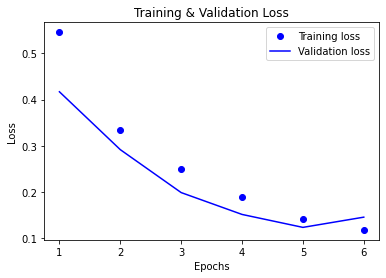

In [13]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_value = history_dict['loss']
val_loss_value=history_dict['val_loss']
acc=history_dict['accuracy']   # missing in the book
val_acc=history_dict['val_accuracy']

epochs = np.arange(1, len(acc)+1)

plt.plot(epochs, loss_value, 'bo', label='Training loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation loss')

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

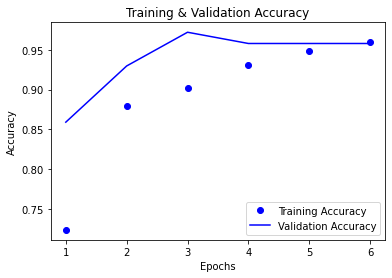

In [14]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
test_loss_score, test_acc_score = model.evaluate(x_test, y_test)

display(test_loss_score, test_acc_score)

4/4 [==============================] - 1s 10ms/step - loss: 0.2741 - accuracy: 0.8774


0.2741304039955139

0.8773584961891174

In [ ]:
# agter 6 epochs loss and accuracy values start diverging.